In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [16]:
df = pd.read_csv("Walmart_Sales.csv")

In [17]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [19]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [20]:
df['Store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [21]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df = df.sort_values('Date')
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1287,10,2010-02-05,2193048.75,0,54.34,2.962,126.442065,9.765
5148,37,2010-02-05,536006.73,0,45.97,2.572,209.852966,8.554
2288,17,2010-02-05,789036.02,0,23.11,2.666,126.442065,6.548
4147,30,2010-02-05,465108.52,0,39.05,2.572,210.752605,8.324
...,...,...,...,...,...,...,...,...
3574,25,2012-10-26,688940.94,0,56.69,3.882,216.151590,7.293
714,5,2012-10-26,319550.77,0,71.70,3.506,224.037814,5.422
5719,40,2012-10-26,921264.52,0,49.65,3.917,138.728161,4.145
2573,18,2012-10-26,1127516.25,0,56.09,3.917,138.728161,8.243


In [22]:
df.groupby('Holiday_Flag')['Weekly_Sales'].mean()

Holiday_Flag
0    1.041256e+06
1    1.122888e+06
Name: Weekly_Sales, dtype: float64

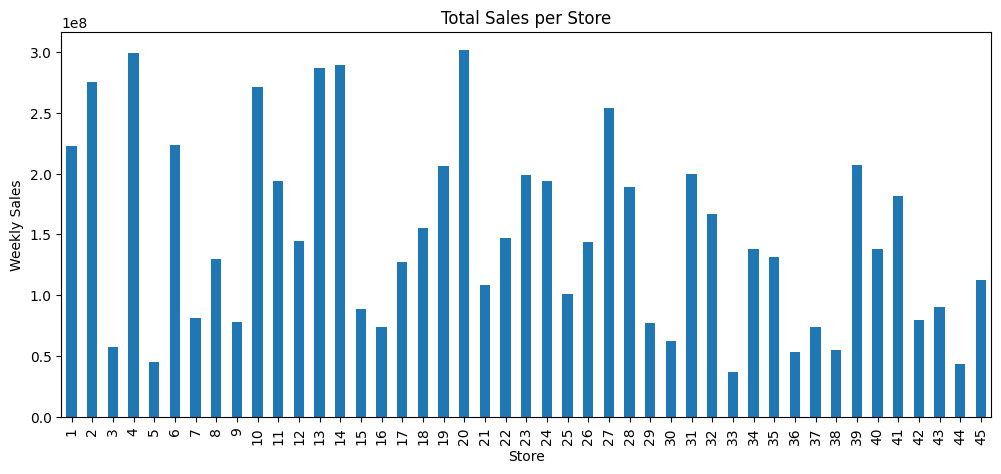

In [23]:
df.groupby('Store')['Weekly_Sales'].sum().plot(kind='bar', figsize=(12,5))
plt.title("Total Sales per Store")
plt.ylabel("Weekly Sales")
plt.show()


<Axes: title={'center': 'Monthly Sales Trend'}, xlabel='Month'>

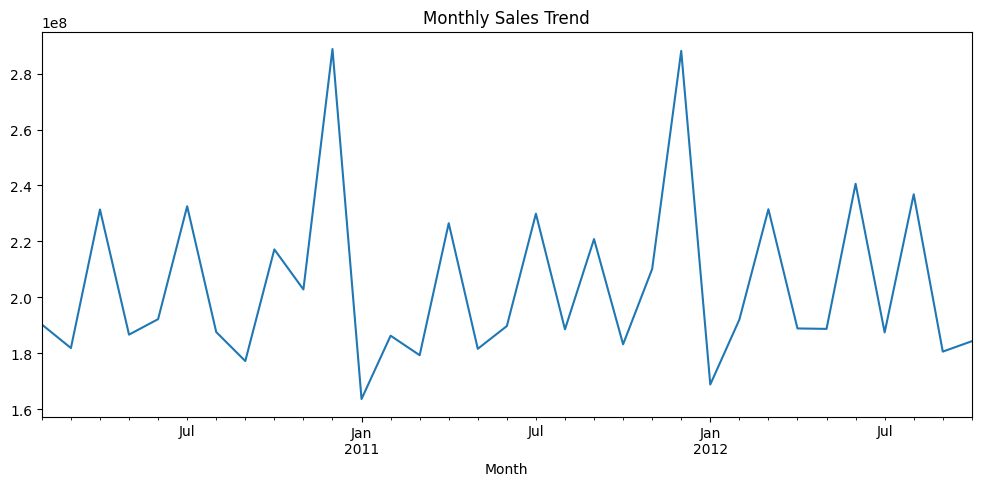

In [24]:
df['Month'] = df['Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Weekly_Sales'].sum()
monthly_sales.plot(figsize=(12,5), title='Monthly Sales Trend')

In [25]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['IsWeekend'] = df['DayOfWeek'].isin([5, 6]).astype(int)

df = df.sort_values(['Store', 'Date'])

# Lag features: previous week's sales
df['Lag_1'] = df.groupby('Store')['Weekly_Sales'].shift(4)
df['Lag_2'] = df.groupby('Store')['Weekly_Sales'].shift(8)
df['Lag_3'] = df.groupby('Store')['Weekly_Sales'].shift(12)
# Temperature lags
df['Lag_Temp_4'] = df.groupby('Store')['Temperature'].shift(1)
df['Lag_Temp_8'] = df.groupby('Store')['Temperature'].shift(2)
df['Lag_Temp_12'] = df.groupby('Store')['Temperature'].shift(3)

# Fuel_Price lags
df['Lag_Fuel_4'] = df.groupby('Store')['Fuel_Price'].shift(4)
df['Lag_Fuel_8'] = df.groupby('Store')['Fuel_Price'].shift(8)
df['Lag_Fuel_12'] = df.groupby('Store')['Fuel_Price'].shift(12)

# CPI lags
df['Lag_CPI_4'] = df.groupby('Store')['CPI'].shift(1)
df['Lag_CPI_8'] = df.groupby('Store')['CPI'].shift(2)
df['Lag_CPI_12'] = df.groupby('Store')['CPI'].shift(3)

# Unemployment lags
df['Lag_Unemp_4'] = df.groupby('Store')['Unemployment'].shift(1)
df['Lag_Unemp_8'] = df.groupby('Store')['Unemployment'].shift(2)
df['Lag_Unemp_12'] = df.groupby('Store')['Unemployment'].shift(3)

# Rolling average sales over past 3 weeks
df['Rolling_Mean_3'] = df.groupby('Store')['Weekly_Sales'].transform(lambda x: x.shift(1).rolling(3).mean())

df['Month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)
df['Month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)
df['Week'] = df['Date'].dt.isocalendar().week.astype(int)
df['DayOfWeek'] = df['Date'].dt.dayofweek

df['Week_sin'] = np.sin(2 * np.pi * df['Week'] / 52)
df['Week_cos'] = np.cos(2 * np.pi * df['Week'] / 52)

df['DOW_sin'] = np.sin(2 * np.pi * df['DayOfWeek'] / 7)
df['DOW_cos'] = np.cos(2 * np.pi * df['DayOfWeek'] / 7)

In [26]:
cols_to_square = [
    'Lag_1', 'Lag_2', 'Lag_3',
    'Lag_Temp_4', 'Lag_Temp_8', 'Lag_Temp_12',
    'Lag_Fuel_4', 'Lag_Fuel_8', 'Lag_Fuel_12',
    'Lag_CPI_4', 'Lag_CPI_8', 'Lag_CPI_12',
    'Lag_Unemp_4', 'Lag_Unemp_8', 'Lag_Unemp_12',
    'Rolling_Mean_3',
    'Month_sin', 'Month_cos',
    'Week_sin', 'Week_cos',
    'DOW_sin', 'DOW_cos'
]

for col in cols_to_square:
    df[f'{col}-sq'] = df[col] ** 2

In [27]:
interaction_pairs = [
    ('Temperature', 'Fuel_Price'),
    ('CPI', 'Unemployment'),
    ('Lag_1', 'Rolling_Mean_3'),
    ('Month_sin', 'Week_sin'),
    ('Holiday_Flag', 'Unemployment'),
    ('Lag_CPI_8', 'Lag_Unemp_12'),
]

for f1, f2 in interaction_pairs:
    new_col = f"{f1}_x_{f2}"
    df[new_col] = df[f1] * df[f2]

In [28]:
df.dropna(inplace=True)


In [29]:
train = df[df['Date'] < '2012-06-01']
test = df[df['Date'] >= '2012-06-01']

features = [
    # Basic features
    'Store', 'Holiday_Flag', 'Temperature', 'CPI', 'Unemployment',
    
    # Lag features
    'Lag_1', 'Lag_2', 'Lag_3',
    'Lag_Temp_4', 'Lag_Temp_12',
    'Lag_Fuel_4', 'Lag_Fuel_12',
    'Lag_Unemp_4', 'Lag_Unemp_8', 'Lag_Unemp_12',
    
    # Date parts
    'Year', 'Month', 'Day',

    # Squared terms
    'Lag_CPI_12-sq',
    'Month_sin-sq',
    'Week_sin-sq',

    # Interaction features
    'Temperature_x_Fuel_Price',
    'CPI_x_Unemployment',
    'Lag_1_x_Rolling_Mean_3',
    'Month_sin_x_Week_sin',
    'Holiday_Flag_x_Unemployment',
    'Lag_CPI_8_x_Lag_Unemp_12',
    
    
    # Cyclical encodings
    'Week_sin'
]

X_train = train[features]
y_train = train['Weekly_Sales']
X_test = test[features]
y_test = test['Weekly_Sales']


In [30]:
model = XGBRegressor(n_estimators=1000, learning_rate=0.02, max_depth=7, subsample=0.8, random_state=42)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.02, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=None, num_parallel_tree=None, ...)

In [31]:
y_pred = model.predict(X_test)

print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

RMSE: 55339.640712708424
MAE: 37698.848768939395
R^2 Score: 0.9892424961491535


In [32]:
booster = model.get_booster()
importance = booster.get_score(importance_type='gain')
importance_df = pd.DataFrame({
    'Feature': list(importance.keys()),
    'Importance (Gain)': list(importance.values())
}).sort_values(by='Importance (Gain)', ascending=False)

print(importance_df)

                        Feature  Importance (Gain)
23       Lag_1_x_Rolling_Mean_3       7.098930e+12
16                        Month       4.126018e+11
17                          Day       8.763798e+10
1                  Holiday_Flag       7.839260e+10
24         Month_sin_x_Week_sin       6.425901e+10
7                         Lag_3       6.281721e+10
5                         Lag_1       6.020659e+10
25  Holiday_Flag_x_Unemployment       5.860597e+10
20                  Week_sin-sq       5.511929e+10
6                         Lag_2       4.025450e+10
14                 Lag_Unemp_12       3.812991e+10
27                     Week_sin       2.556498e+10
15                         Year       2.045750e+10
13                  Lag_Unemp_8       1.261382e+10
8                    Lag_Temp_4       1.106932e+10
9                   Lag_Temp_12       1.042258e+10
19                 Month_sin-sq       9.770571e+09
22           CPI_x_Unemployment       9.725112e+09
26     Lag_CPI_8_x_Lag_Unemp_12

In [33]:
# Training predictions
y_train_pred = model.predict(X_train)

# Train metrics
print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Train MAE:", mean_absolute_error(y_train, y_train_pred))
print("Train R^2 Score:", r2_score(y_train, y_train_pred))

Train RMSE: 13801.049039859105
Train MAE: 10322.058093781856
Train R^2 Score: 0.9994173475520374


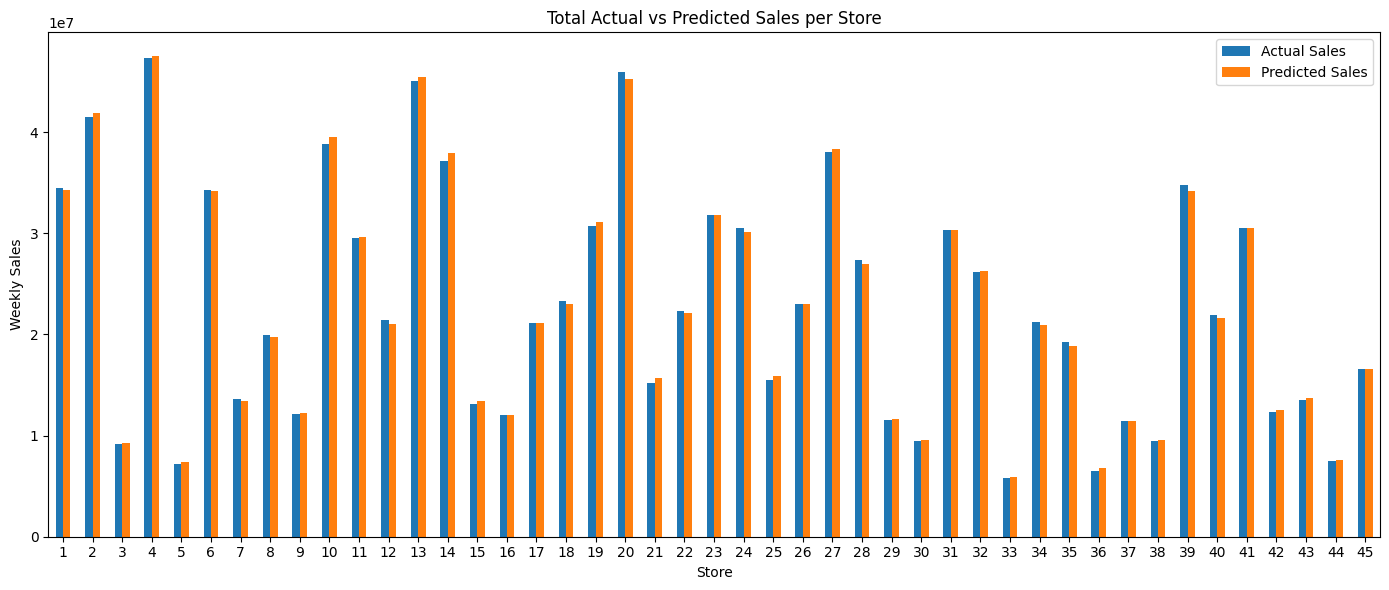

In [34]:
# Predict on test set
y_pred = model.predict(X_test)

# Create X_test_with_store
X_test_with_store = X_test.copy()

# Bring back the Store column from the original dataset
X_test_with_store['Store'] = df.loc[X_test.index, 'Store']

# Add actual and predicted sales
X_test_with_store['Actual_Sales'] = y_test.values
X_test_with_store['Predicted_Sales'] = y_pred

# Group by Store
grouped = X_test_with_store.groupby('Store')[['Actual_Sales', 'Predicted_Sales']].sum()

grouped.plot(kind='bar', figsize=(14, 6))
plt.title("Total Actual vs Predicted Sales per Store")
plt.ylabel("Weekly Sales")
plt.xlabel("Store")
plt.xticks(rotation=0)
plt.legend(["Actual Sales", "Predicted Sales"])
plt.tight_layout()
plt.show()


[View Presentation](https://docs.google.com/presentation/d/1kytXHnF3DmXxgcqgXMyfL_GcwupQjOK1nJjZLy9QhMw/edit?usp=sharing)